<h1>Data Cleaning & Prepration</h1>

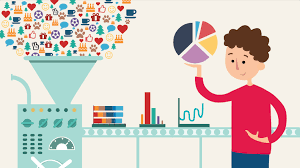
<p>a significant amount of time is spent on data prepration:loading, cleaning, transforming and rearranging.<br>
    such tasks are often reported to take up 80% or more of an analyst's time. sometimes the way the data is stored in files or databases is not in the right format for a particular task.so we can use general purpose programming language like python, R, Java to do ad hoc processing from one form to anthor, and Fortunately python has pandas.<br>
    in this kernel i will discuss tools for missing data, duplicate data string manipulation,some other analytical data transformations, combining and rearranging datasets in different ways.</p>
<h4>Plan of kernel</h4>
<ul>
    <li>load Data</li>
    <li>Get some informations about data</li>
    <li>Handling Missing Data</li>
    <li>Data Transformation</li>
    <li>String Manipulation</li>
    <li>Combining & Merging datasets</li>
</ul>

<h1>Load Data</h1>

In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')
df.head()

<h1>Get some informations about data</h1>
<p>there are two different ways to get some informations about your data, first one by use pd.dataframe.info() which is the esaist and saves more time, but i prefer to do it by creating a function to give me all informations i need to know</p>

<h2>Frist Method</h2>

In [ ]:
df.info()

<h2>Second Method</h2>

In [ ]:
def get_info(df):
    print('number of variables: ',df.shape[1])
    print('number of cases: ',df.shape[0])
    print('-'*10)
    print('variables(columns) names: ')
    print(df.columns)
    print('-'*10)
    print('data-type of each variable: ')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in columns: ')
    c=df.isnull().sum()
    print(c[c>0])
get_info(df)

<h1>Handling Missing Data</h1>
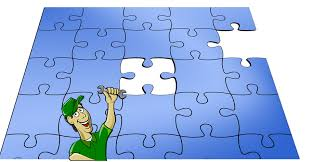

<p>Pandas using floating-point value Nan to represent missing data, we can use pandas to identify the columns that have missing values</p>

In [ ]:
df.isnull()

<p> as we can see this doesn't give us enough information about missing data, let's make it effective</p>

In [ ]:
df.isnull().sum()

<p>we can use pandas too, to identify the number of rows in each columns that have values.</p> 

In [ ]:
df.notnull().sum()

<h2>Filtering Out Missing Data</h2>

<p>1-First we see that county column doesn't contain any data, so I am going to drop it, and we can use this technique if any column hasn't enough data like 95% missing values.</p>

In [ ]:
cleaned_df=df.drop('county',axis=1)

<p>2-first technique get rid of missing values is to drop all the rows which have missing values by using dropna().<br>
but this is not the best technique to remove missing values</p>  

In [ ]:
cleaned_df.dropna().head()

<h2>Filling in missing data</h2>

<p>2-rather than filtering out missing data, we may want to fill the missing values with any value we choose, and this is the best techinque to remove missing values from our data set</p> 

In [ ]:
for i in cleaned_df.drop(['model','manufacturer','paint_color'],axis=1).columns:
    if cleaned_df[i].dtype=='float':
        cleaned_df[i]=cleaned_df[i].fillna(cleaned_df[i].mean())
    if cleaned_df[i].dtype=='object':
        cleaned_df[i]=cleaned_df[i].fillna(cleaned_df[i].mode()[0])
cleaned_df['year']=cleaned_df['year'].fillna(cleaned_df['year'].mode()[0])
cleaned_df['model']=cleaned_df['model'].fillna('Unknown')
cleaned_df['manufacturer']=cleaned_df['manufacturer'].fillna('Unknown')
cleaned_df['paint_color']=cleaned_df['paint_color'].fillna('Unknown')

<p>now our dataset has no missing values</p>

<h1>Data Transformation</h1>
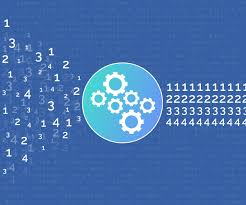

<h2>Removing Duplicates</h2>
<p>duplicated data may be found in a DataFrame for any number of reasons</p> 

In [ ]:
cleaned_df.duplicated()

<p>each row (car) has specific id, so we are going to drop all the rows that have duplicated id</p>

In [ ]:
cleaned_df=cleaned_df.drop_duplicates(['id'])
print('done')

<h2>Transforming Data Using Function</h2>
<p>For many datasets you may want to perform some transformations based on the values in a columns in dataframe</p> 

In [ ]:
def odometer_status(val):
    if val>101729.96151504324:
        return  'alot'
    else:
        return 'little'
cleaned_df['odometer_status']=df['odometer'].apply(odometer_status)

In [ ]:
cleaned_df[['odometer_status','odometer']].tail()

<p>as we can see here's an example of data transformation by function and here we transform odometer column to object type column.</p>

<h2>Replacing Values</h2>

<p>some values in price column is 0 which is not right let's use replace() to replace this values by the median value of price column</p>

In [ ]:
cleaned_df['price']=cleaned_df['price'].replace(0,cleaned_df['price'].median())

<h2>Renaming columns and indexes</h2>
<p>We can use pandas to rename the columns</p>

In [ ]:
for i in cleaned_df.columns:
    changer=i.title()
    cleaned_df.rename(columns={i:changer},inplace=True)

In [ ]:
cleaned_df.columns

<p>now all the names of columns from lowercase to title</p>

<h2>Detecting & Filtering Outliers</h2>
<p>before going to filter the data from outliers, we are going to define something very important to learn</p>
<h3>What is the IQR</h3>
<p>The "interquartile range", abbreviated "IQR", is just the width of the box in the box-and-whisker plot. That is, IQR = Q3 – Q1 . The IQR can be used as a measure of how spread-out the values are.

Statistics assumes that your values are clustered around some central value. The IQR tells how spread out the "middle" values are; it can also be used to tell when some of the other values are "too far" from the central value. These "too far away" points are called "outliers", because they "lie outside" the range in which we expect them.

The IQR is the length of the box in your box-and-whisker plot. An outlier is any value that lies more than one and a half times the length of the box from either end of the box.
That is, if a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable. Maybe you bumped the weigh-scale when you were making that one measurement, or maybe your lab partner is an idiot and you should never have let him touch any of the equipment. Who knows? But whatever their cause, the outliers are those points that don't seem to "fit".</p>
<p>Now I am going to use Price column and seaborn library to visualize the outliers in this column from the data</p>

In [ ]:
import seaborn as sns
sns.boxplot('Price',data=cleaned_df)

<p>from the box plot above, we can see the outliers as dots</p>

In [ ]:
price_stats=cleaned_df['Price'].describe()
price_stats

In [ ]:
from scipy.stats import iqr
iqr=iqr(cleaned_df['Price'])
iqr

In [ ]:
upper_bound=price_stats['75%']+(1.5*iqr)
lower_bound=price_stats['25%']-(1.5*iqr)
outliers={'above_upper':0,'below_lower':0}
indexes=[]
for i,j in enumerate(cleaned_df['Price'].values):
    if j>upper_bound :
        outliers['above_upper']+=1
        indexes.append(i)
    elif j<lower_bound:
        outliers['below_lower']+=1
        indexes.append(i)

In [ ]:
outliers

<p>there are 21098 outlier price in dataset</p>

<h2>Computing Indicator/Dummy Variables</h2>
<p>Another type of transformations for statistical modeling or machine learning applications is converting a categorical variable into dummy matrix. if a column is a Dataframe has K distinct values, you would derive a matrix or dataframe with K columns containing  all 1s and 0s.pandas has get_dummies() function.</p> 

In [ ]:
drive_dummy_df=pd.get_dummies(cleaned_df['Drive'],prefix='Drive')
drive_dummy_df.tail(10)

<h1>String Manipulation</h1>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqCdwZmyEGpPe3oTQVUihDOHMJhFWxi0jnh-3AzQNMtSweO5S1zw&s'>
<p>python has long been a popular raw data manipulation language in part due to its ease of use for string and text processing. most text operations are made simple with the string's object's built in methods. (check the link below)</p>
<a href='https://www.programiz.com/python-programming/methods/string'>string methods</a>

<p>now I am going to remove 'cylinders' word from Cylinder column</p>

In [ ]:
cleaned_df['Cylinders']=cleaned_df['Cylinders'].str.replace('cylinders','')

In [ ]:
cleaned_df['Cylinders'].head()

<h1>Combining and Merging Datasets</h1>
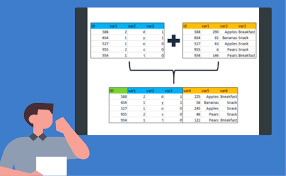
<p>Data contained  in pandas objects can be combined together in a number of ways: </p>
<ul>
    <li>pandas.merge()</li>
    <li>pandas.concat()</li>
</ul>

<h2>Database-Style DataFrame Joins</h2>
<p>merge or join operations combine datasets by linking rows using one or more keys these operations are central or relational datasets.</p> 

In [ ]:
pd.merge(cleaned_df['Drive'],drive_dummy_df,right_index=True,left_index=True)

<p>let's use different examples to understand</p>

In [ ]:
df1=pd.DataFrame({'key':['b','b','a','c','a','a','b'],'data1':range(7)})
df2=pd.DataFrame({'key':['a','b','c'],'data2':range(3)})
pd.merge(df1,df2,on='key')

<h4>how parameter</h4>
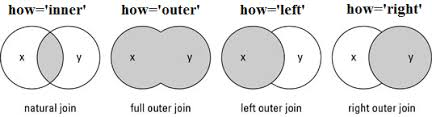

In [ ]:
df3=pd.DataFrame({'key':['a','f','b'],'data3':range(3)})
pd.merge(df1,df3,how='right')

<h2>Concatenating Along an axis</h2>

In [ ]:
cleaned_df=pd.concat([cleaned_df,drive_dummy_df],axis=1)
cleaned_df=cleaned_df.drop('Drive',axis=1)

In [ ]:
cleaned_df.columns

<p>I hope this kernel useful to you guys, thank you</p>